In [2]:
import geogif # render gifs from raster images
import geopandas as gpd # handle geospatial data frames
from IPython.display import Image # visualize URLs
import pandas as pd # data wrangling
import pystac_client # connecting to the STAC API
from rasterio.enums import Resampling # perform resampling operations
import rioxarray # handle spatio-temporal arrays
import shapely # create vector objects
import stackstac # build an on-demand STAC data cube

In [3]:
api_url = 'https://earth-search.aws.element84.com/v1'

In [4]:
client = pystac_client.Client.open(api_url)
for collection in client.get_collections():
    print(collection)

<CollectionClient id=cop-dem-glo-30>
<CollectionClient id=naip>
<CollectionClient id=sentinel-2-l2a>
<CollectionClient id=sentinel-2-l1c>
<CollectionClient id=landsat-c2-l2>
<CollectionClient id=cop-dem-glo-90>
<CollectionClient id=sentinel-1-grd>


In [5]:
collection = 'sentinel-2-l2a'

In [6]:
lon = 10.9
lat = 48.3

datetime = '2022-05-01/2022-09-01'
point = shapely.Point(lon, lat)

In [7]:
search = client.search(
    collections=[collection],
    intersects=point,
    datetime=datetime,
    query=["eo:cloud_cover<10"],
)

In [8]:
items = search.item_collection()
len(items)

11

In [10]:
df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,created,platform,constellation,instruments,eo:cloud_cover,proj:epsg,mgrs:utm_zone,mgrs:latitude_band,mgrs:grid_square,...,s2:granule_id,s2:reflectance_conversion_factor,datetime,s2:sequence,earthsearch:s3_path,earthsearch:payload_id,earthsearch:boa_offset_applied,processing:software,updated,s2:mgrs_tile
0,"POLYGON ((10.94766 48.73654, 11.85242 48.71769...",2022-11-06T13:26:22.123Z,sentinel-2a,sentinel-2,[msi],7.302156,32632,32,U,PU,...,S2A_OPER_MSI_L2A_TL_ATOS_20220816T162557_A0373...,0.974147,2022-08-16T10:17:42.652000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/0a88...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:26:22.123Z,NaN
1,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:27:08.988Z,sentinel-2b,sentinel-2,[msi],8.245043,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220814T130923_A0284...,0.973483,2022-08-14T10:27:30.139000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/af67...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:27:08.988Z,NaN
2,"POLYGON ((10.96506 48.73625, 11.85242 48.71769...",2022-11-05T22:58:13.395Z,sentinel-2b,sentinel-2,[msi],0.029720,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220811T162101_A0283...,0.972541,2022-08-11T10:17:33.717000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/1b1c...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-05T22:58:13.395Z,32UPU
3,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-05T19:45:09.079Z,sentinel-2a,sentinel-2,[msi],0.039180,32632,32,U,PU,...,S2A_OPER_MSI_L2A_TL_ATOS_20220809T180703_A0372...,0.971958,2022-08-09T10:27:38.886000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/2000...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-05T19:45:09.079Z,32UPU
4,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:27:16.119Z,sentinel-2b,sentinel-2,[msi],0.019446,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220804T130854_A0282...,0.970637,2022-08-04T10:27:31.640000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/e580...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:27:16.119Z,NaN
5,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:28:17.495Z,sentinel-2b,sentinel-2,[msi],0.097777,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220725T132135_A0281...,0.968647,2022-07-25T10:27:32.176000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/758e...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:28:17.495Z,NaN
6,"POLYGON ((10.95772 48.73637, 11.85242 48.71769...",2022-11-06T14:04:50.606Z,sentinel-2b,sentinel-2,[msi],0.730002,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220722T130911_A0280...,0.968224,2022-07-22T10:17:35.155000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/feaa...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T14:04:50.606Z,NaN
7,"POLYGON ((10.95174 48.73647, 11.85242 48.71769...",2022-11-06T13:26:15.478Z,sentinel-2b,sentinel-2,[msi],0.051958,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220702T130622_A0277...,0.967556,2022-07-02T10:17:35.298000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/11a4...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:26:15.478Z,NaN
8,"POLYGON ((10.94658 48.73656, 11.85242 48.71769...",2022-11-06T13:26:13.879Z,sentinel-2a,sentinel-2,[msi],0.012398,32632,32,U,PU,...,S2A_OPER_MSI_L2A_TL_ATOS_20220627T162810_A0366...,0.967975,2022-06-27T10:17:42.879000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/6474...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:26:13.879Z,NaN
9,"POLYGON ((10.95487 48.73642, 11.85242 48.71769...",2022-11-05T22:35:48.262Z,sentinel-2b,sentinel-2,[msi],3.358487,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220612T132443_A027

<Axes: title={'center': 'eo:cloud-cover'}, xlabel='datetime'>

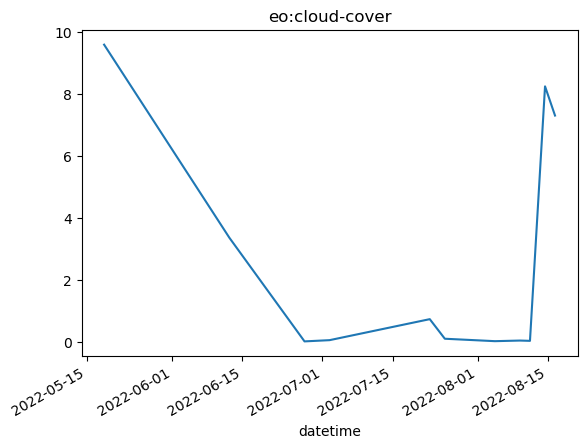

In [18]:
df["datetime"] = pd.to_datetime(df["datetime"])

ts = df.set_index("datetime").sort_index()["eo:cloud_cover"]
ts.plot(title="eo:cloud-cover")

In [19]:
df_filt = df.loc[(df['eo:cloud_cover'] <= 2) & (df['s2:nodata_pixel_percentage'] <= 10)]
df_filt

,geometry,created,platform,constellation,instruments,eo:cloud_cover,proj:epsg,mgrs:utm_zone,mgrs:latitude_band,mgrs:grid_square,...,s2:granule_id,s2:reflectance_conversion_factor,datetime,s2:sequence,earthsearch:s3_path,earthsearch:payload_id,earthsearch:boa_offset_applied,processing:software,updated,s2:mgrs_tile
3,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-05T19:45:09.079Z,sentinel-2a,sentinel-2,[msi],0.039180,32632,32,U,PU,...,S2A_OPER_MSI_L2A_TL_ATOS_20220809T180703_A0372...,0.971958,2022-08-09 10:27:38.886000+00:00,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/2000...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-05T19:45:09.079Z,32UPU
4,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:27:16.119Z,sentinel-2b,sentinel-2,[msi],0.019446,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220804T130854_A0282...,0.970637,2022-08-04 10:27:31.640000+00:00,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/e580...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:27:16.119Z,NaN
5,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:28:17.495Z,sentinel-2b,sentinel-2,[msi],0.097777,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220725T132135_A0281...,0.968647,2022-07-25 10:27:32.176000+00:00,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/758e...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:28:17.495Z,NaN


In [21]:
item = items[df_filt.index[0]]
item.properties

{'created': '2022-11-05T19:45:09.079Z',
 'platform': 'sentinel-2a',
 'constellation': 'sentinel-2',
 'instruments': ['msi'],
 'eo:cloud_cover': 0.03918,
 'proj:epsg': 32632,
 'mgrs:utm_zone': 32,
 'mgrs:latitude_band': 'U',
 'mgrs:grid_square': 'PU',
 'grid:code': 'MGRS-32UPU',
 'view:sun_azimuth': 156.694778716916,
 'view:sun_elevation': 55.7321723052208,
 's2:degraded_msi_data_percentage': 0.0218,
 's2:nodata_pixel_percentage': 3e-06,
 's2:saturated_defective_pixel_percentage': 0,
 's2:dark_features_percentage': 0.020597,
 's2:cloud_shadow_percentage': 0.037969,
 's2:vegetation_percentage': 75.264871,
 's2:not_vegetated_percentage': 23.076606,
 's2:water_percentage': 1.445091,
 's2:unclassified_percentage': 0.11566,
 's2:medium_proba_clouds_percentage': 0.029194,
 's2:high_proba_clouds_percentage': 0.003709,
 's2:thin_cirrus_percentage': 0.006277,
 's2:snow_ice_percentage': 1.7e-05,
 's2:product_type': 'S2MSI2A',
 's2:processing_baseline': '04.00',
 's2:product_uri': 'S2A_MSIL2A_2022

In [22]:
item.assets.keys()

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])

In [23]:
thumbnail = item.assets["thumbnail"].href
Image(url = thumbnail)

In [24]:
footprint = gpd.read_file("augsburg_boundary.geojson")
footprint.total_bounds

array([10.80162048, 48.25485552, 10.98976135, 48.44560024])

In [41]:
cube = stackstac.stack(
    items,
    resolution=100,
    bounds_latlon=footprint.total_bounds,
    resampling=Resampling.bilinear
)
cube

C:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\stackstac\prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-a683b9e224c92d4f021ae090c90aee5c' (time: 11,
                                                                band: 32,
                                                                y: 217, x: 145)>
dask.array<fetch_raster_window, shape=(11, 32, 217, 145), dtype=float64, chunksize=(1, 1, 217, 145), chunktype=numpy.ndarray>
Coordinates: (12/53)
  * time                                     (time) datetime64[ns] 2022-05-18...
    id                                       (time) <U24 'S2A_32UPU_20220518_...
  * band                                     (band) <U12 'aot' ... 'wvp-jp2'
  * x                                        (x) float64 6.332e+05 ... 6.476e+05
  * y                                        (y) float64 5.368e+06 ... 5.346e+06
    mgrs:utm_zone                            int32 32
    ...                                       ...
    raster:bands                             (band) object [{'nodata': 0, 'da...
    gsd                                      (band) object None 10 ... None None
    common_name                              (band) object None 'blue' ... None
    center_wavelength                        (band) object None 0.49 ... None
    full_width_half_max                      (band) object None 0.098 ... None
    epsg                                     int32 32632
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(633200, 5346100, 647700, 5367...
    crs:         epsg:32632
    transform:   | 100.00, 0.00, 633200.00|\n| 0.00,-100.00, 5367800.00|\n| 0...
    resolution:  100

In [29]:
vegetation_percentage = cube['s2:vegetation_percentage']
vegetation_percentage

<xarray.DataArray 's2:vegetation_percentage' (time: 11)>
array([71.638954, 83.347332, 89.629269, 88.409495, 73.600411, 74.645436,
       75.000745, 75.264871, 73.803222, 67.28698 , 63.917571])
Coordinates: (12/44)
  * time                                     (time) datetime64[ns] 2022-05-18...
    id                                       (time) <U24 'S2A_32UPU_20220518_...
    mgrs:utm_zone                            int32 32
    s2:reflectance_conversion_factor         (time) float64 0.9791 ... 0.9741
    created                                  (time) <U24 '2022-11-05T19:44:35...
    s2:water_percentage                      (time) float64 1.556 ... 1.717
    ...                                       ...
    proj:epsg                                int32 32632
    s2:snow_ice_percentage                   (time) object 2.3e-05 ... 5.5e-05
    s2:thin_cirrus_percentage                (time) float64 9.011 ... 0.000619
    s2:not_vegetated_percentage              (time) float64 16.37 ... 21.08
    s2:granule_id                            (time) <U62 'S2A_OPER_MSI_L2A_TL...
    epsg                                     int32 32632

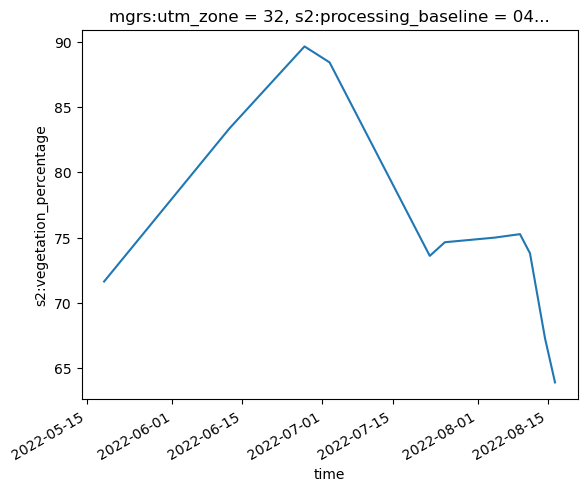

In [30]:
cube['s2:vegetation_percentage'].plot()

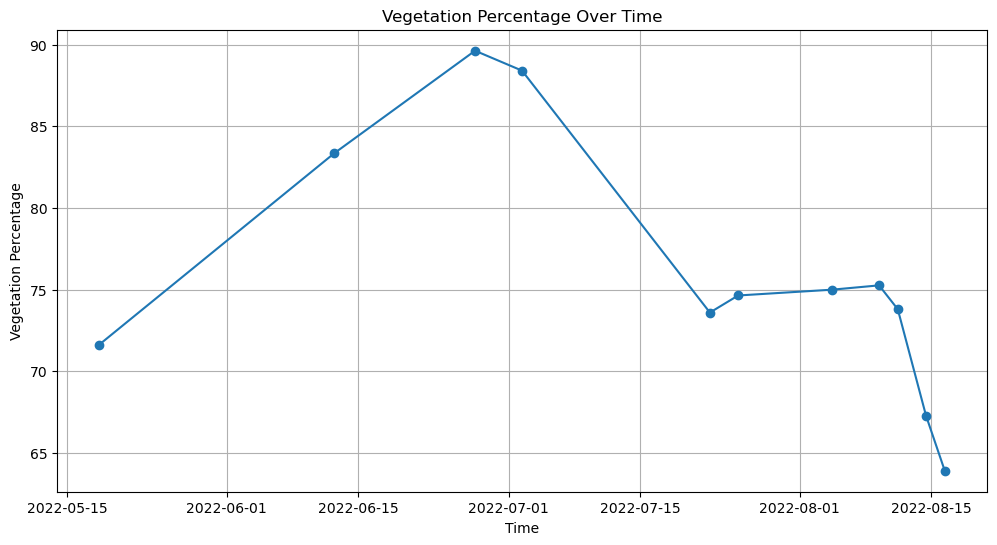

In [43]:
import matplotlib.pyplot as plt

# Plot the vegetation percentage over time
plt.figure(figsize=(12, 6))
plt.plot(vegetation_percentage.time, vegetation_percentage, marker='o')
plt.xlabel('Time')
plt.ylabel('Vegetation Percentage')
plt.title('Vegetation Percentage Over Time')
plt.grid(True)
plt.show()

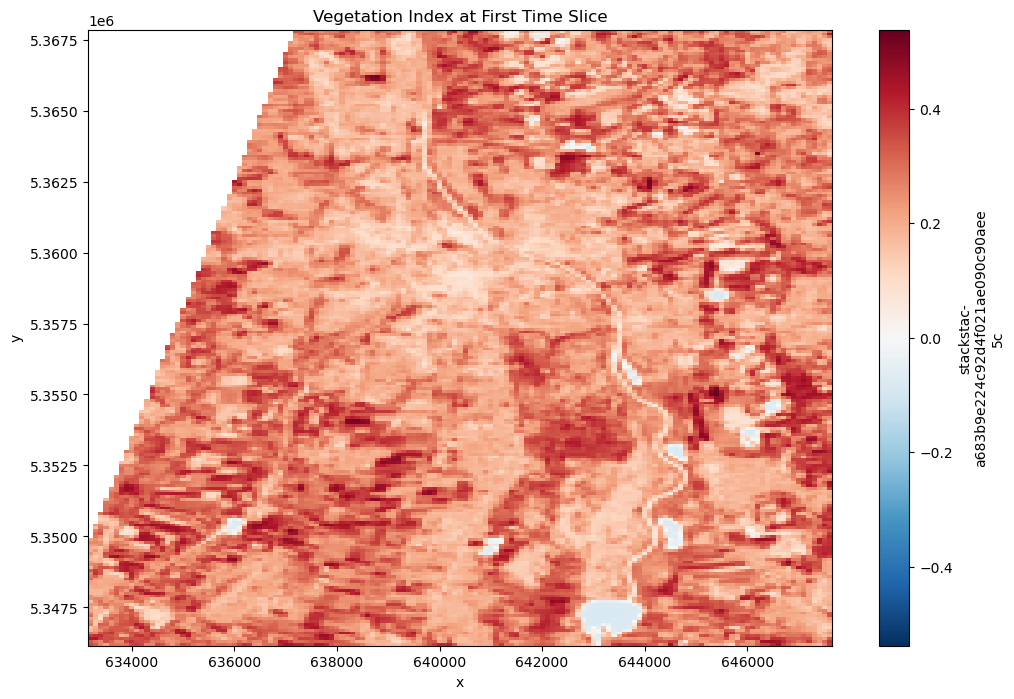

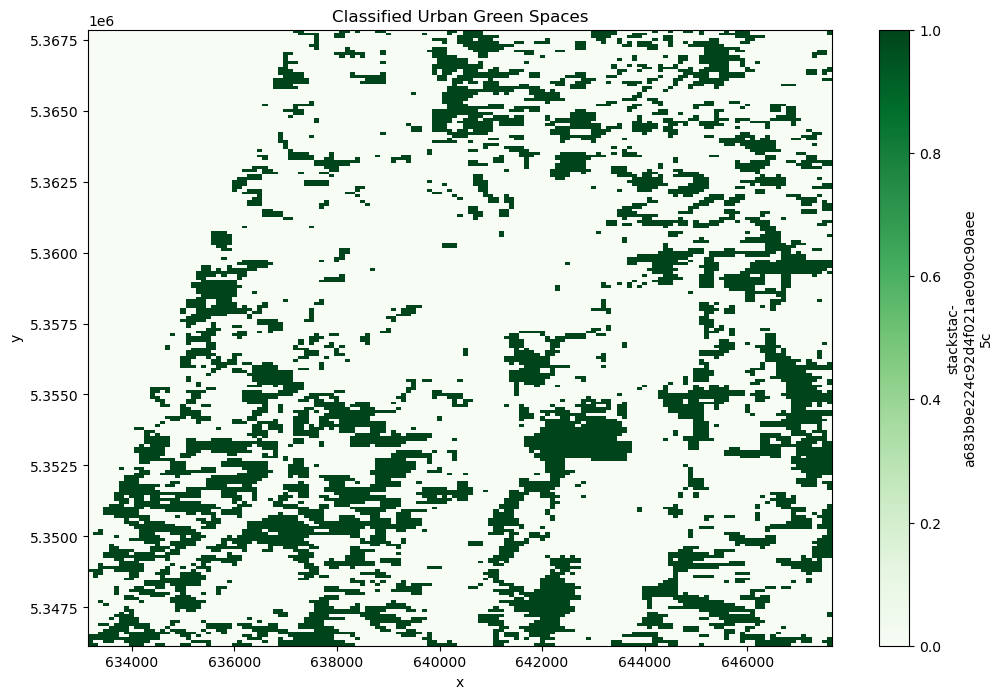

In [45]:
veg_band = cube.sel(band='nir08')

# Select a specific time slice
veg_band_at_time = veg_band.isel(time=0)

# Plot the vegetation band
plt.figure(figsize=(12, 8))
veg_band_at_time.plot()
plt.title('Vegetation Index at First Time Slice')
plt.show()

# To identify green spaces, decide on a threshold for vegetation percentage
threshold = 0.3  # This is just an example; you need to determine the appropriate threshold

# Apply the threshold to classify each pixel
green_spaces = veg_band_at_time > threshold

# Plot the classified green spaces
plt.figure(figsize=(12, 8))
green_spaces.plot(cmap='Greens')
plt.title('Classified Green Spaces')
plt.show()

PandasIndex(Index(['aot', 'blue', 'coastal', 'green', 'nir', 'nir08', 'nir09', 'red',
       'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'visual',
       'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2',
       'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2',
       'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2',
       'wvp-jp2'],
      dtype='object', name='band'))

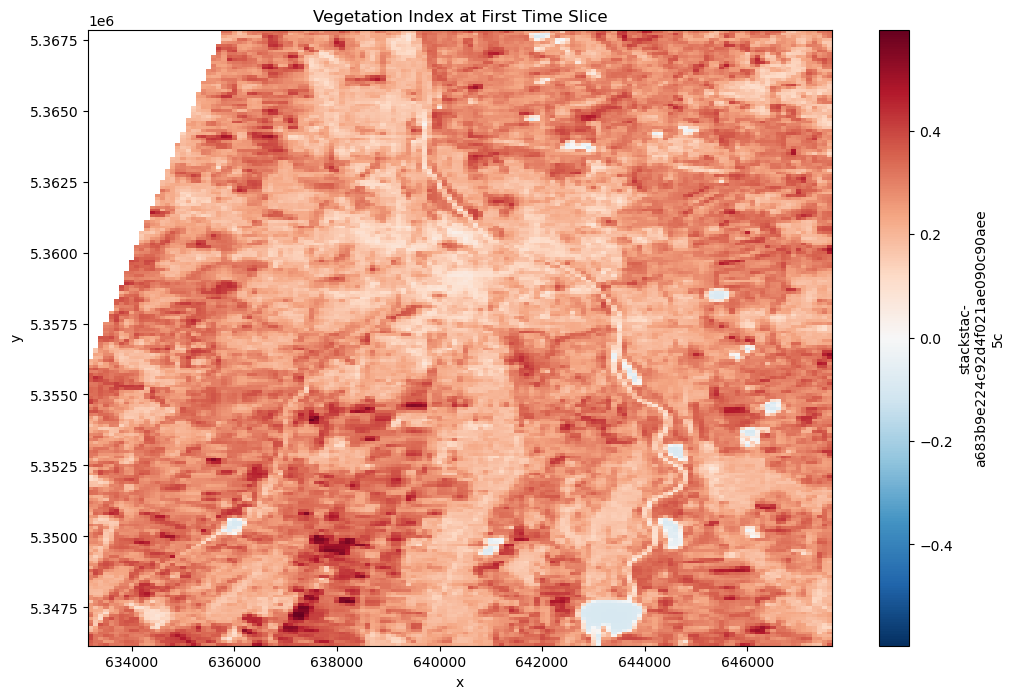

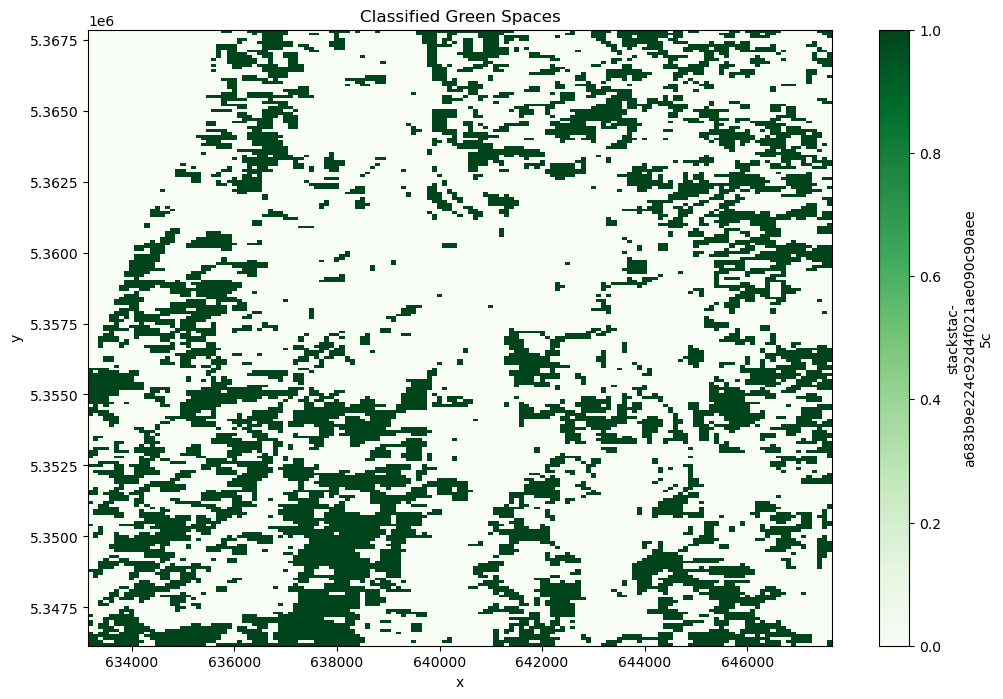

In [52]:
veg_band = cube.sel(band='nir08')

veg_band_at_time = veg_band.isel(time=2)

plt.figure(figsize=(12, 8))
veg_band_at_time.plot()
plt.title('Vegetation Index at First Time Slice')
plt.show()

threshold = 0.3 

# Apply the threshold to classify each pixel
green_spaces = veg_band_at_time > threshold

plt.figure(figsize=(12, 8))
green_spaces.plot(cmap='Greens')
plt.title('Classified Green Spaces')
plt.show()

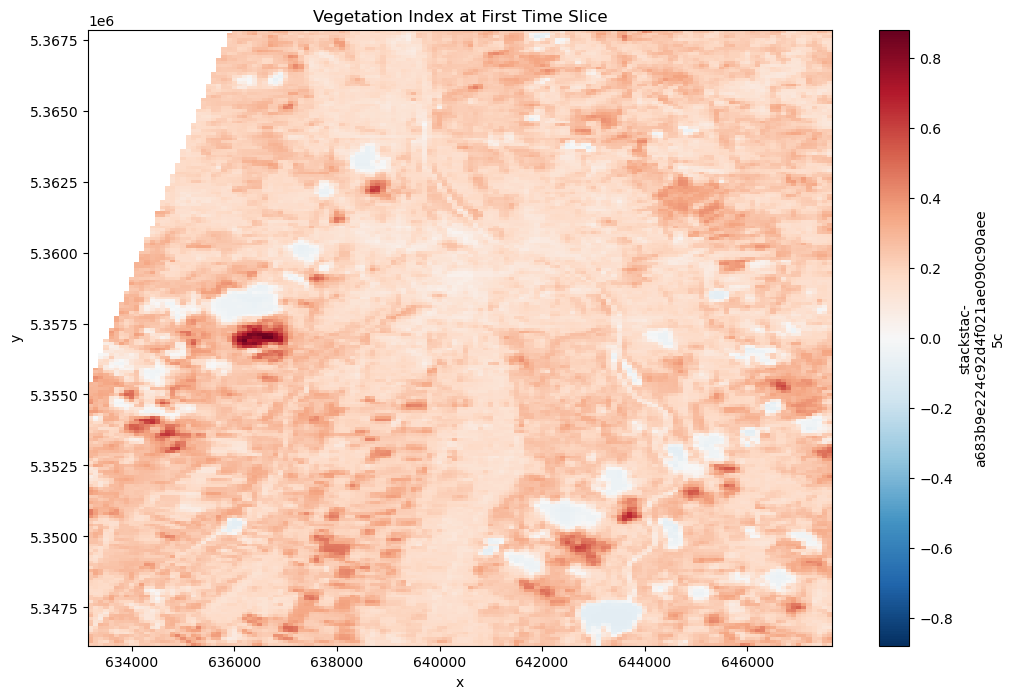

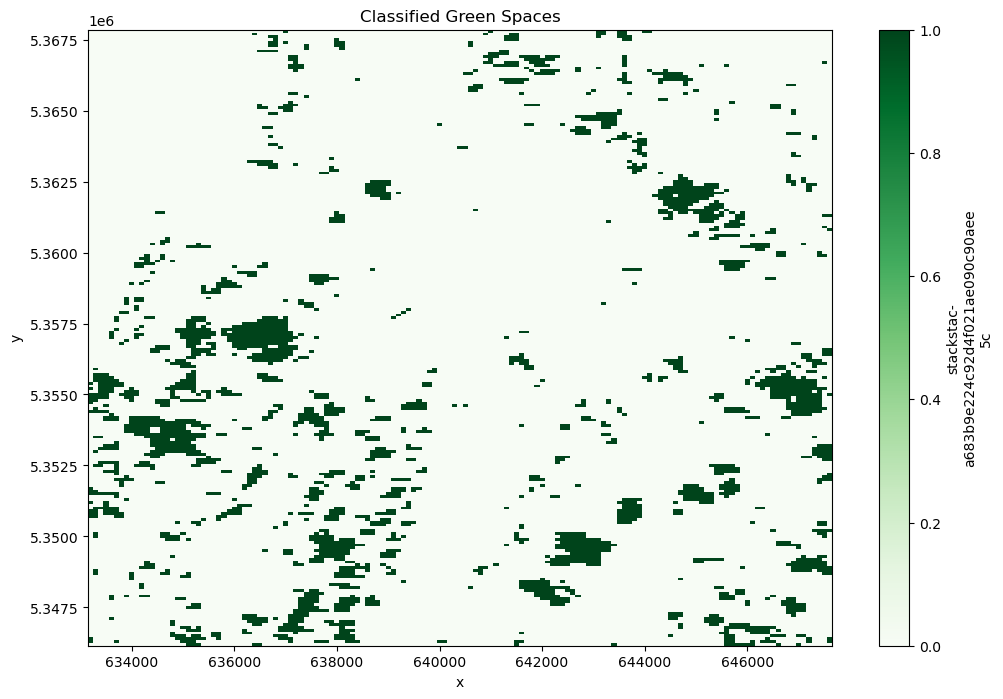

In [53]:
veg_band = cube.sel(band='nir08')

veg_band_at_time = veg_band.isel(time=10)

plt.figure(figsize=(12, 8))
veg_band_at_time.plot()
plt.title('Vegetation Index at First Time Slice')
plt.show()

threshold = 0.3 

# Apply the threshold to classify each pixel
green_spaces = veg_band_at_time > threshold

plt.figure(figsize=(12, 8))
green_spaces.plot(cmap='Greens')
plt.title('Classified Green Spaces')
plt.show()

C:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\dask\core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


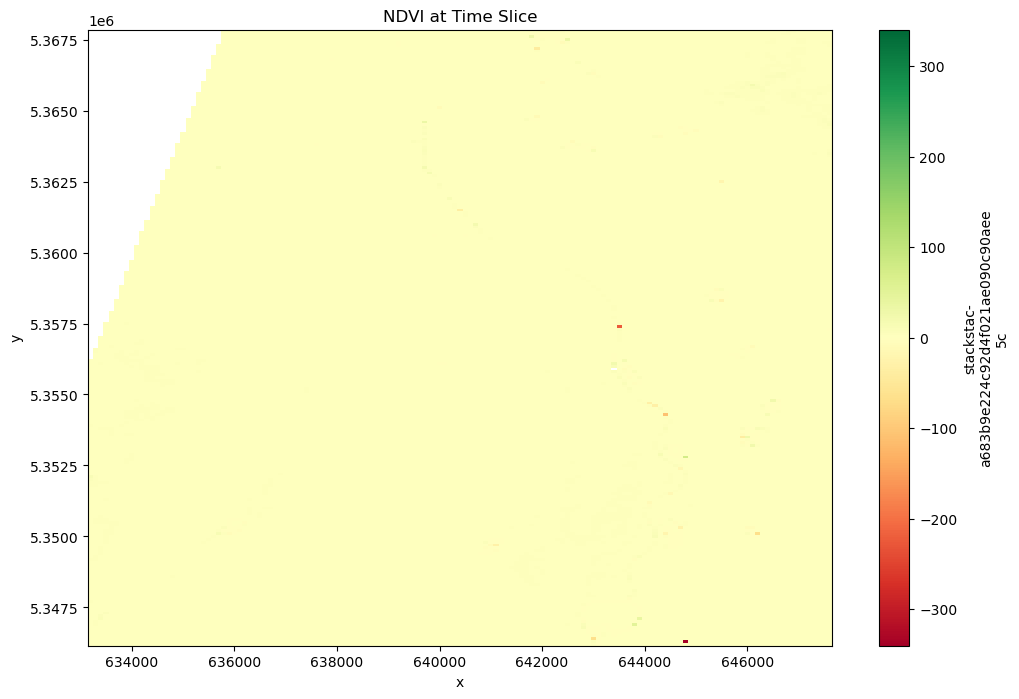

C:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\dask\core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


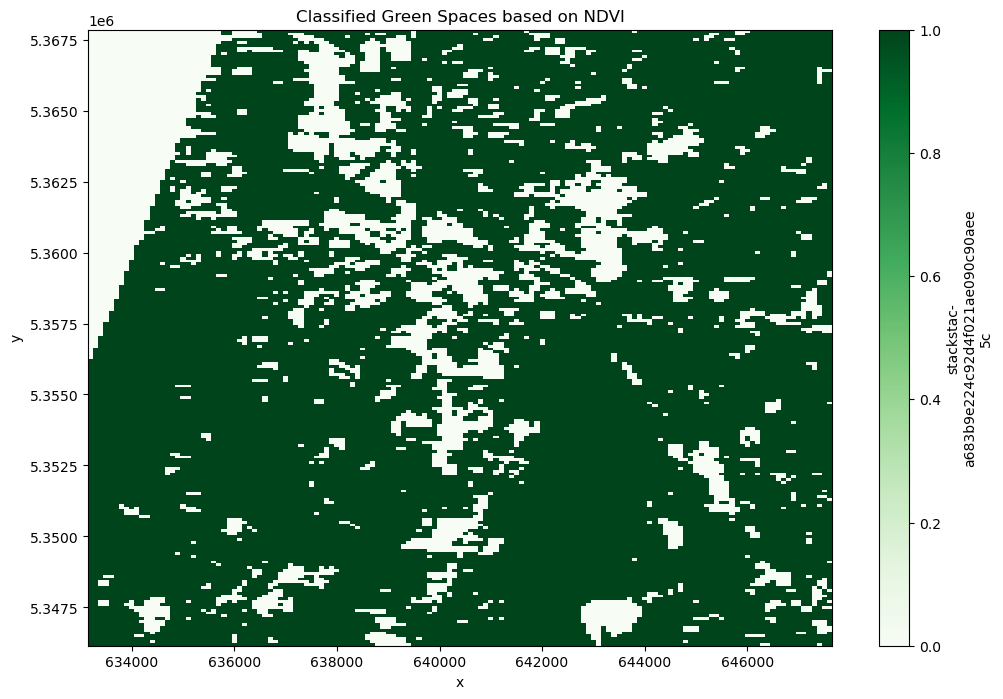

In [68]:
nir_band = cube.sel(band='nir')
red_band = cube.sel(band='red')

nir_at_time = nir_band.isel(time=2)
red_at_time = red_band.isel(time=2)

ndvi = (nir_at_time - red_at_time) / (nir_at_time + red_at_time)

plt.figure(figsize=(12, 8))
ndvi.plot(cmap='RdYlGn')
plt.title('NDVI at Time Slice')
plt.show()

ndvi_threshold = 0.8  
green_spaces_ndvi = ndvi > ndvi_threshold

plt.figure(figsize=(12, 8))
green_spaces_ndvi.plot(cmap='Greens')
plt.title('Classified Green Spaces based on NDVI')
plt.show()

C:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\dask\core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


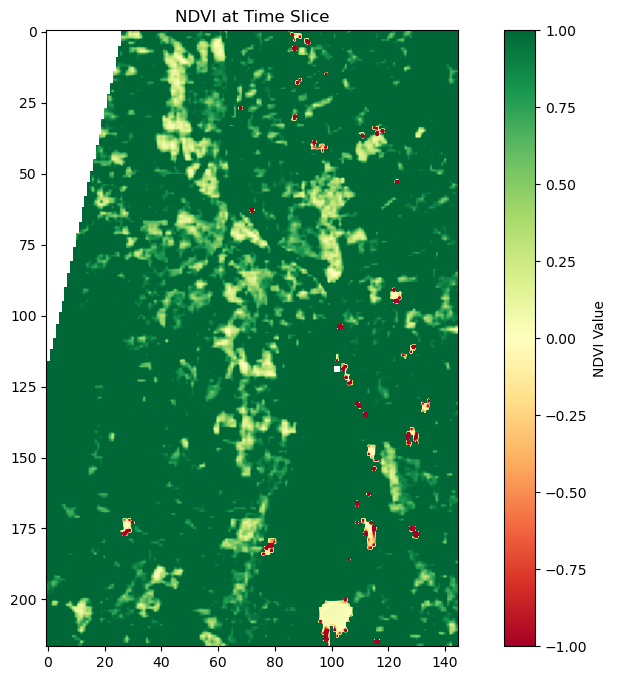

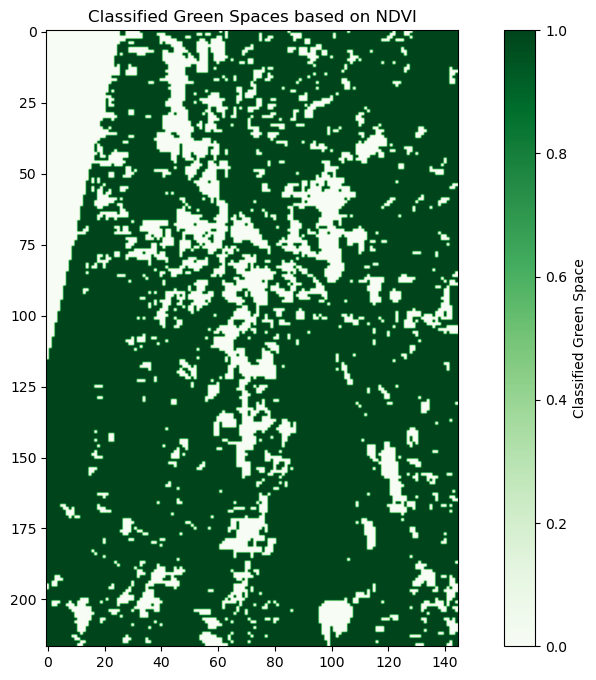

In [72]:
import numpy as np
import matplotlib.pyplot as plt

nir_band = cube.sel(band='nir').isel(time=2) 
red_band = cube.sel(band='red').isel(time=2) 

mask = (nir_band + red_band) != 0
ndvi = xr.where(mask, (nir_band - red_band) / (nir_band + red_band), np.nan)

ndvi_computed = ndvi.compute()
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(ndvi_computed, cmap='RdYlGn', vmin=-1, vmax=1)
fig.colorbar(im, ax=ax, label='NDVI Value')
ax.set_title('NDVI at Time Slice')
plt.show()

ndvi_threshold = 0.85
green_spaces_ndvi = ndvi_computed > ndvi_threshold

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(green_spaces_ndvi, cmap='Greens')
fig.colorbar(im, ax=ax, label='Classified Green Space')
ax.set_title('Classified Green Spaces based on NDVI')
plt.show()